# Practical work №2
#### Student: Vishnevskaya Aleksandra
#### Date: 05.06.2022

$\textbf{Формулировка задачи:}$ Оценить аналитически длину ряда $N \Delta t$  необходимую для полного
разрешения в периодограмме двух близких спектральных линий,
соответствующих гармоническим компонентам с частотами $\nu_1$ и $\nu_2$.
Используя программу СКАВРя, постройте периодограммы рядов с
меньшей и большей длинами для того, чтобы увидеть эффекты слияния
линий, а также картины их частичного и полного разрешения

# Program code

### Procedures and imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.fft import fft, ifft

In [3]:
def sigma_n(A1, A2, gamma):
    return(np.sqrt(A1**2+A2**2/2/gamma))

def eps(N):
    return(norm.rvs(size=N))
           
def makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt):
    t=[dt*k for k in range(N)]
    x=[alpha+beta*t[k]+A1*np.cos(2*np.pi*nu1*t[k]-phi1)+\
       alpha+beta*t[k]+A2*np.cos(2*np.pi*nu2*t[k]-phi2)\
       +sigma_n(A1, A2, gamma)*eps(N)[k] for k in range(0,N)]
    return([t,x])

def centred_data(data, trend):
    return(data[1]-trend(data[0]))


def DFun(data,N):
    return(1/N**2*(data.real**2+data.imag**2))

def dnu(N2, dt):
    return(1/N2/dt)
    
def plotPeriodogram():
    fig, ax = plt.subplots(1,1, figsize = (20,10))
    ax.plot(nu, D[:N1],  label = f'gamma = {gamma}, N = {N}')
    ax.plot([nu[0], nu[N1-1]],[var*X1/N,var*X1/N], linestyle='--')
    ax.grid()
    ax.set_ylim(0,0.5)
    ax.set_xlabel('Time, [s]')
    ax.set_title('Schuster periodogram')
    ax.legend()
    plt.savefig(f'Schuster_g{gamma}_N{N}.pdf')
    plt.show()
    return

### Initial data

In [4]:
dt = 1; q = 0.01; X1 = 9.0
A1 = 1; nu1 = 0.1; phi1 = 0
alpha = 0.1; beta = 0.05

X2 = 7.0
A2 = 1; nu2 = 0.104; phi2 = 0

### Estimation of length of the time series

$$ |\nu_1 - \nu_2 | \geq \frac{2}{N \Delta t} => N \Delta t \geq \frac{2}{|\nu_1 - \nu_2 |} \\ 
N * 1 \geq \frac{2}{|0.1 - 0.104 |} = 500$$

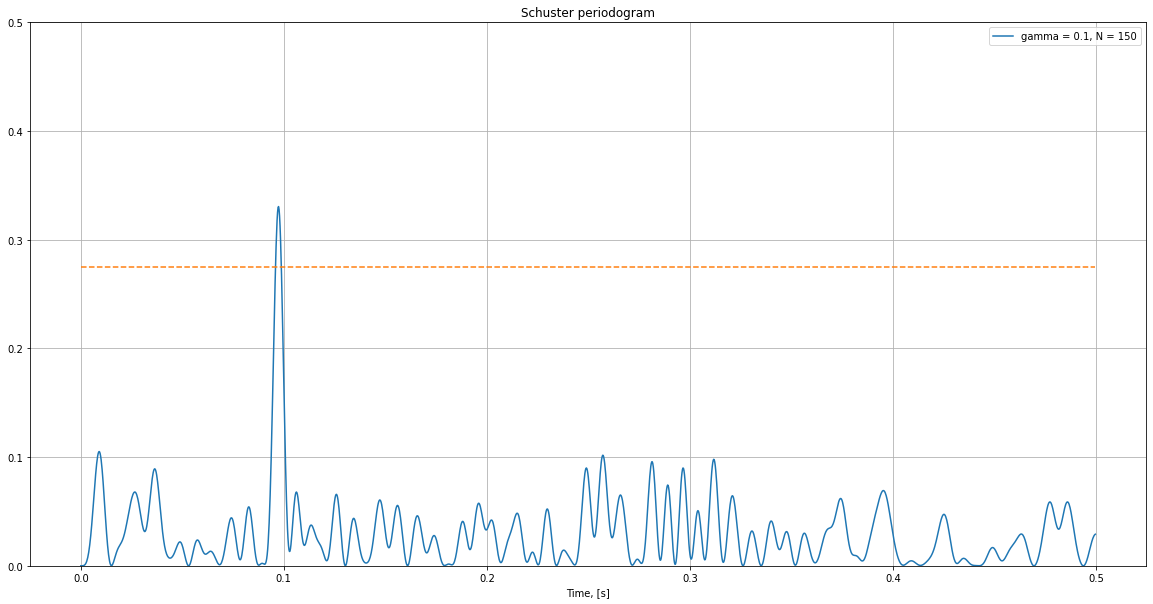

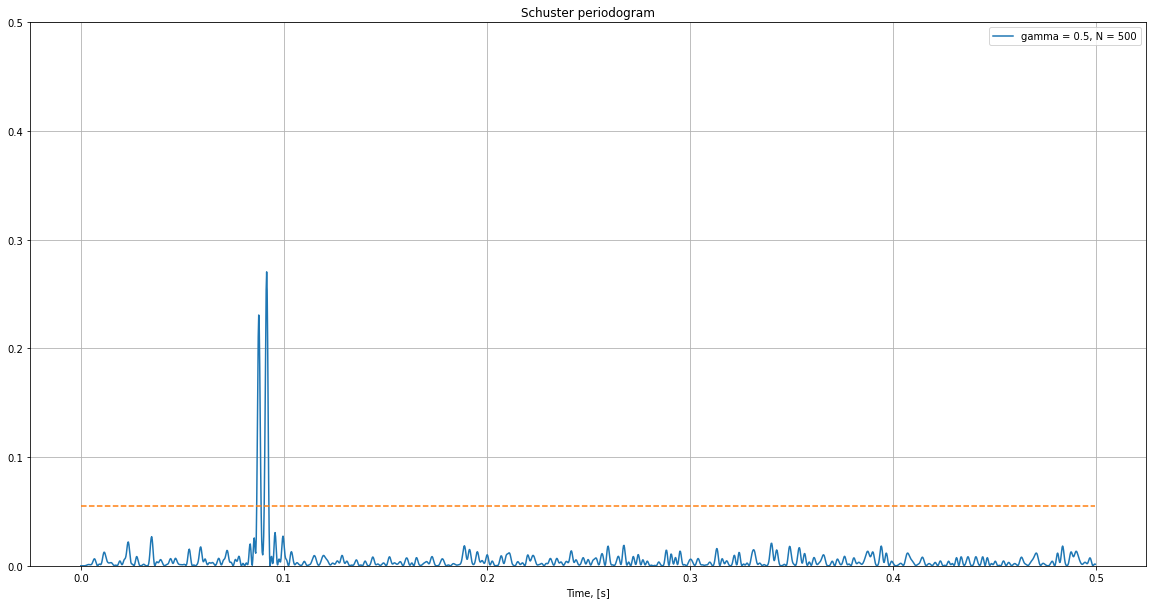

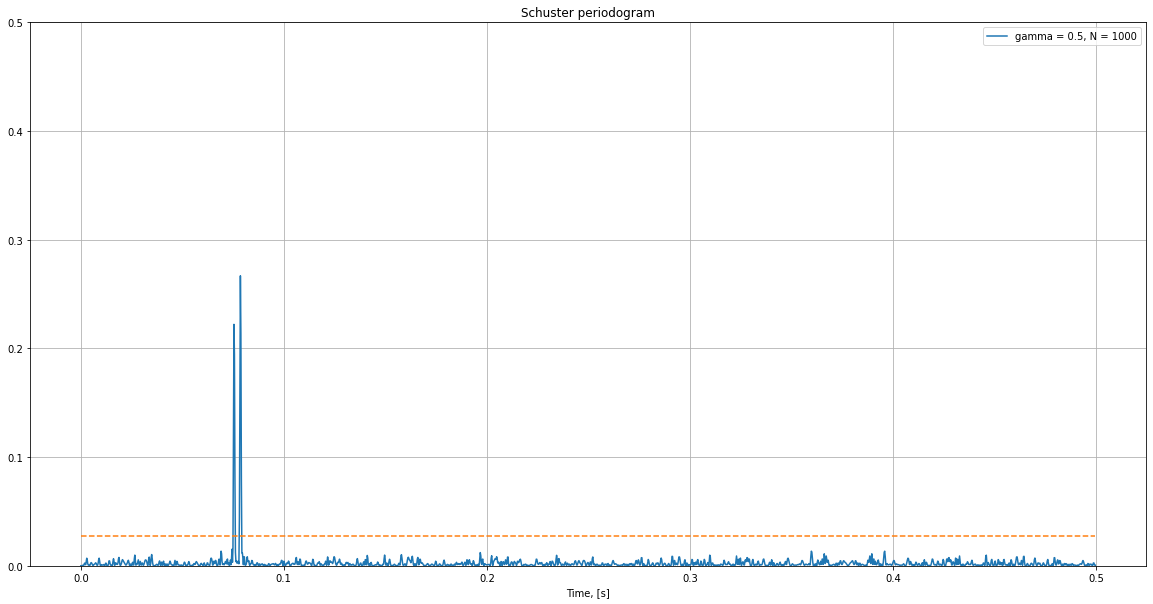

In [6]:
N = 150
gamma = 0.1
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

N1 = 2048; N2 = 2*N1

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)
plotPeriodogram()
# --------------------------------------------------------------------------------------

N = 500
gamma = 0.5
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()
# ------------------------------------------------------------------------------------------
N = 1000
gamma = 0.5
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()


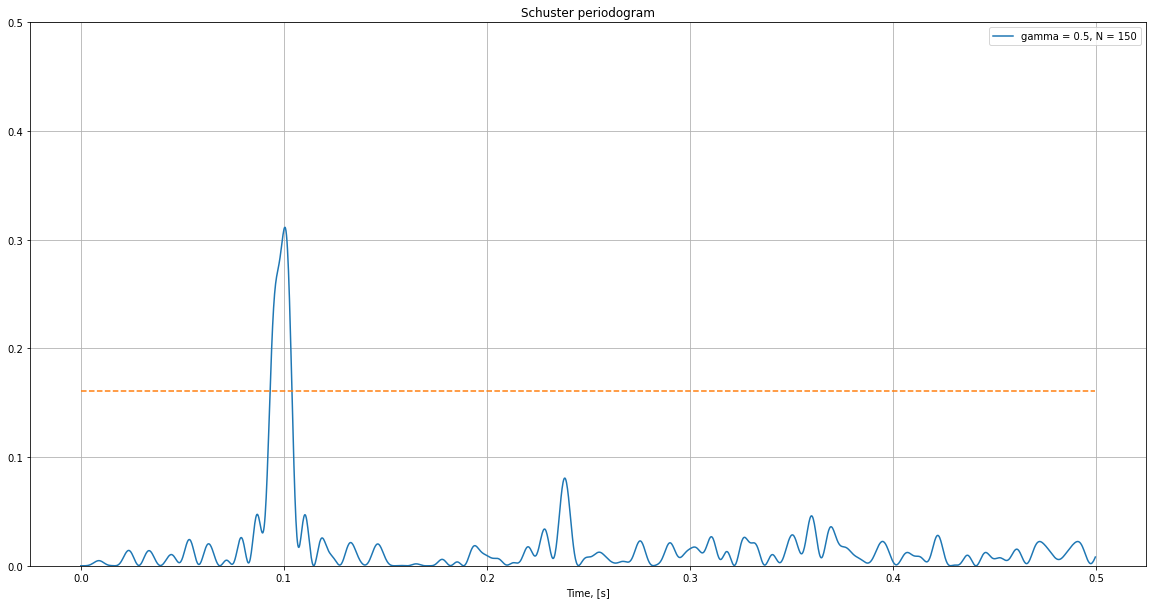

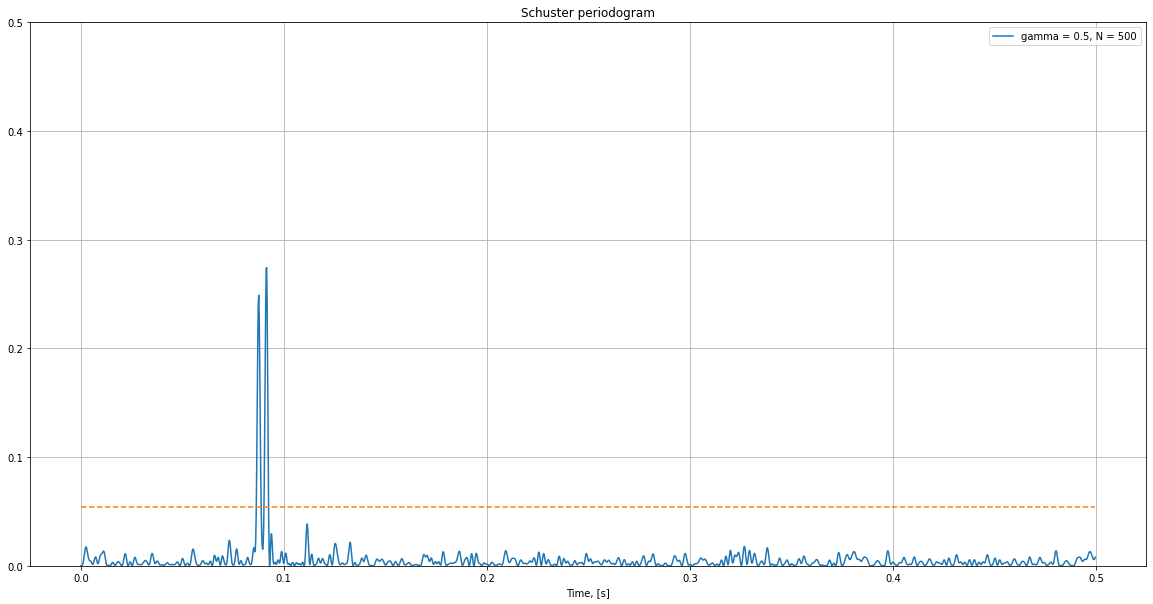

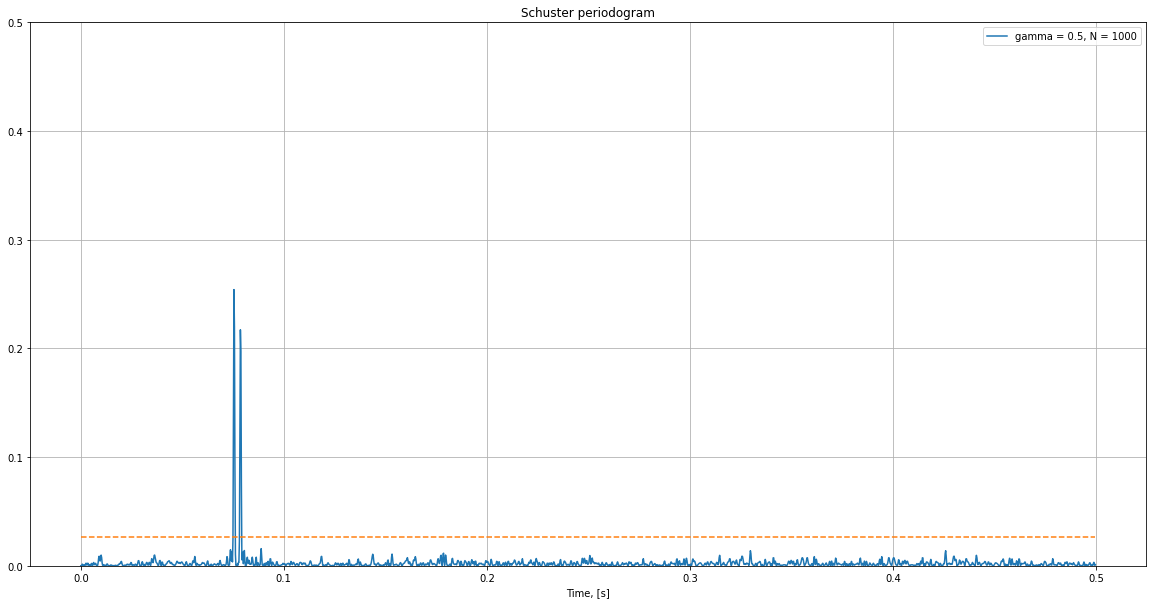

In [7]:
N = 150
gamma = 0.5
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

N1 = 2048; N2 = 2*N1

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)
plotPeriodogram()
# --------------------------------------------------------------------------------------

N = 500
gamma = 0.5
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()
# ------------------------------------------------------------------------------------------
N = 1000
gamma = 0.5
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()


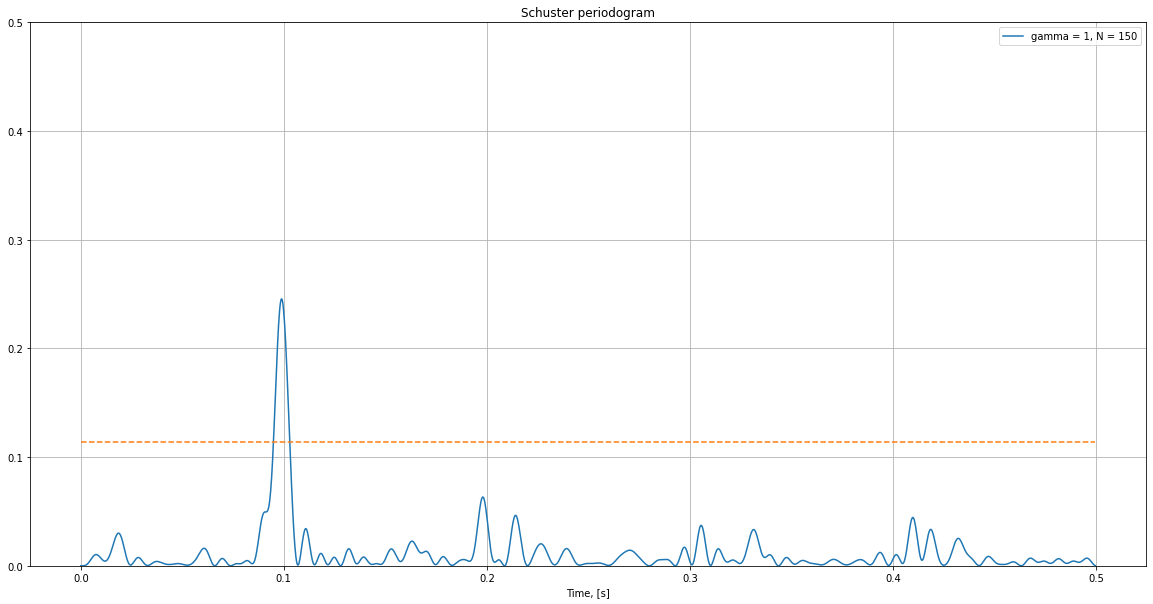

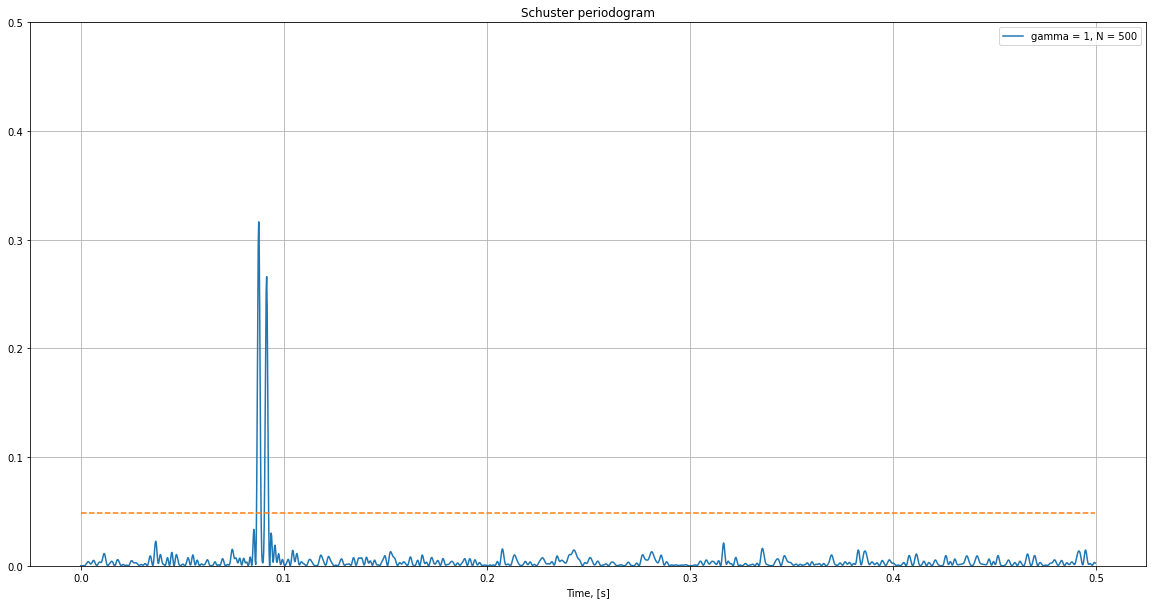

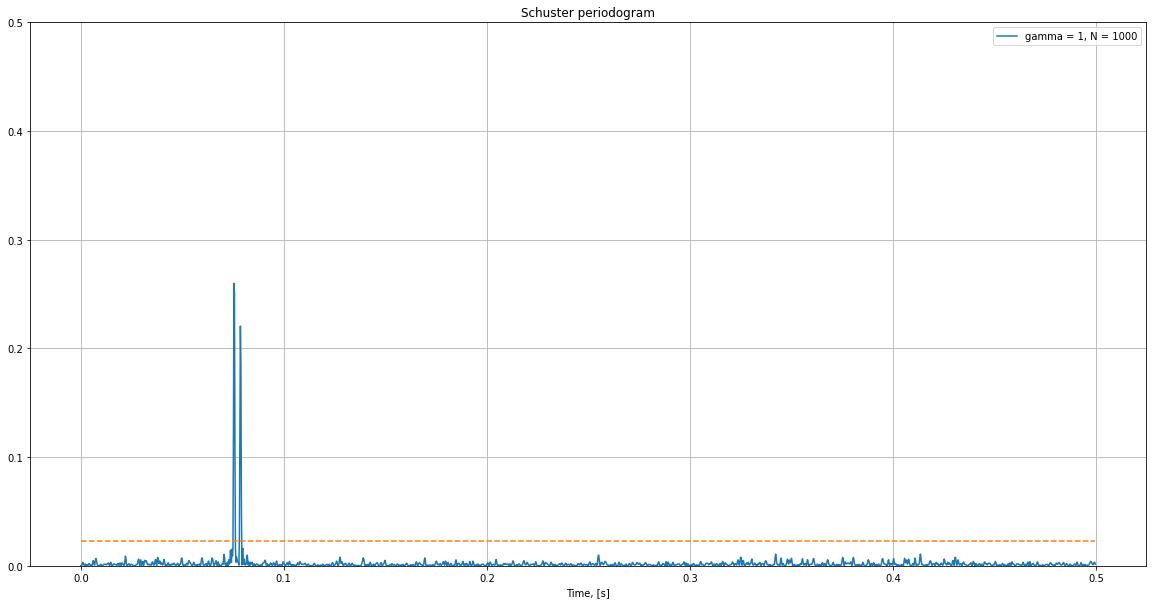

In [8]:
N = 150
gamma = 1
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

N1 = 2048; N2 = 2*N1

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)
plotPeriodogram()
# --------------------------------------------------------------------------------------

N = 500
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()
# ------------------------------------------------------------------------------------------
N = 1000
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()


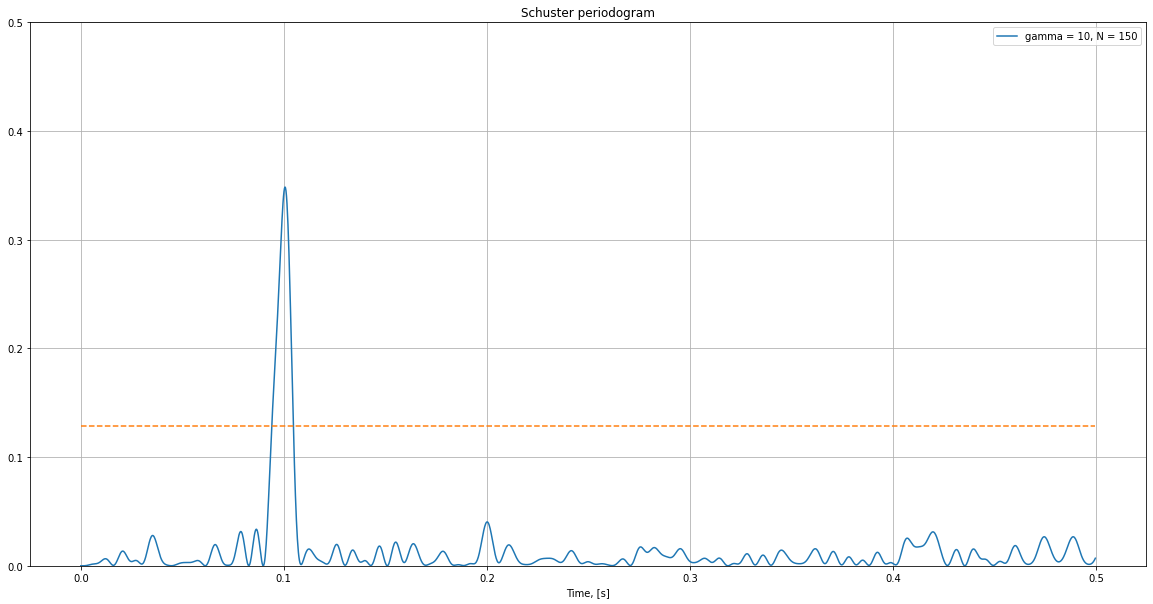

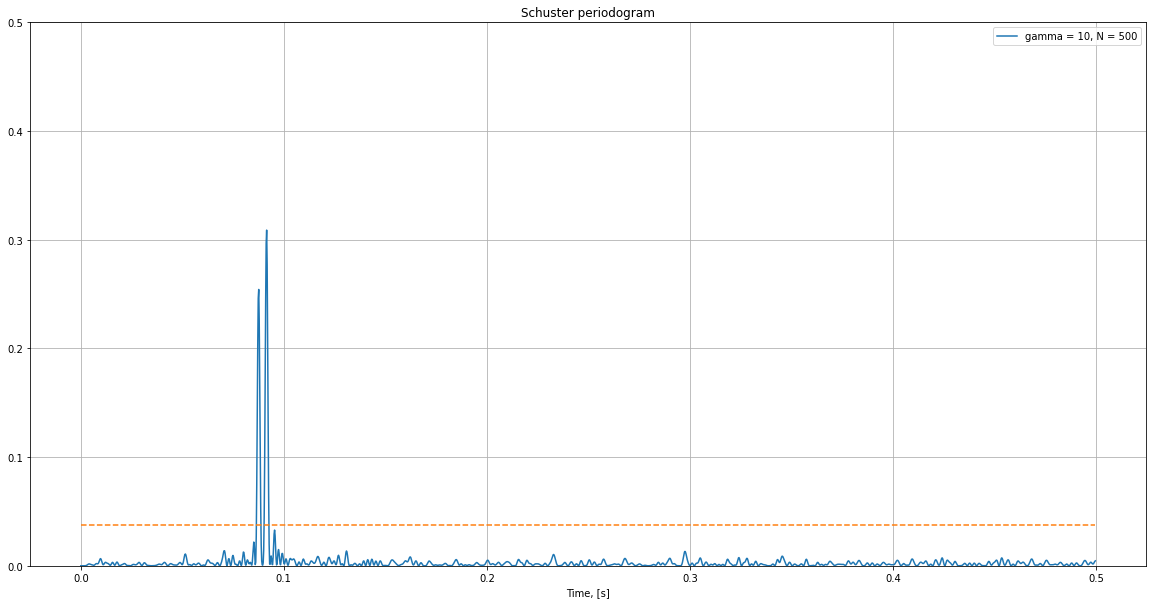

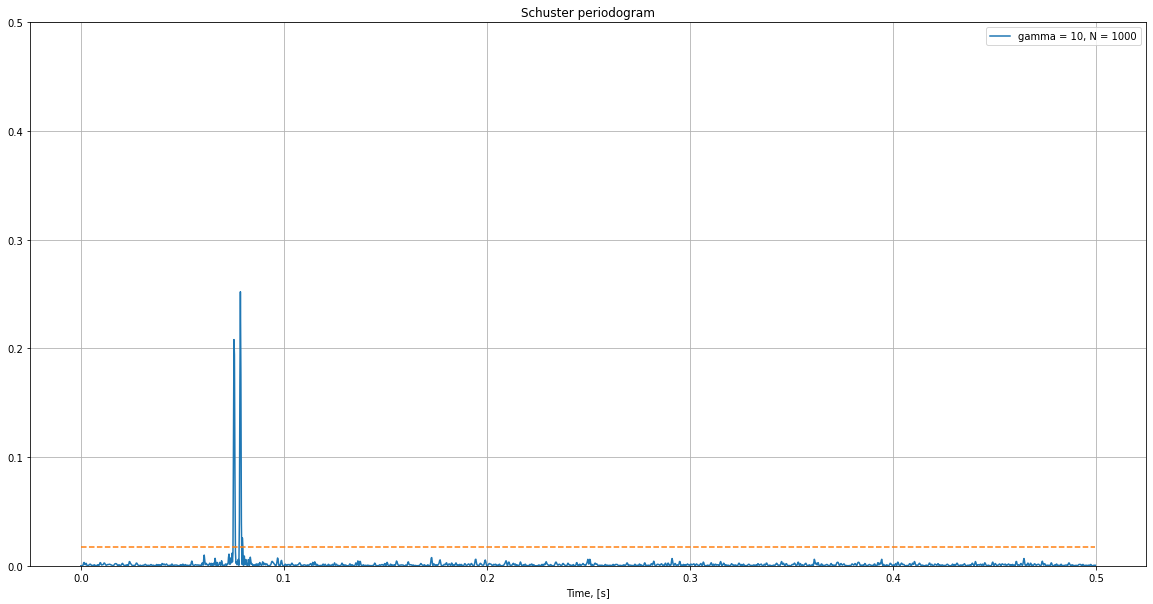

In [9]:
N = 150
gamma = 10
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

N1 = 2048; N2 = 2*N1

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)
plotPeriodogram()
# --------------------------------------------------------------------------------------

N = 500
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()
# ------------------------------------------------------------------------------------------
N = 1000
data = makeData42(alpha, beta, A1, nu1, phi1, A2, nu2, phi2, gamma, N, dt)

fp, residuals, rank, sv, rcond = np.polyfit(data[0], data[1], 1, full=True)
trend = np.poly1d(fp)

supp_data = centred_data(data, trend)
for i in range(N,N2-N): supp_data = np.append(supp_data,0)
fft_data = np.fft.fft(supp_data)
D = DFun(fft_data,N)
nu = np.array([dnu(N2,dt)*j for j in range(N1)])
#var = np.var(supp_data)
var = 1/(N-1)*np.sum(supp_data**2)

plotPeriodogram()


#### Анализ зависимости разрешимости спектральных линий от показателя $\gamma$

$\gamma$ - показатель отношения "сигнал к шуму" (signal-to-noise ratio). Как мы можем видеть, построенные графики наглядно это показывают - чем меньше $\gamma$, тем уровень сигнала всё более сравним с уровнем шума, что очевидно из формул и подтверждается на практике. Однако, даже при низких показателях, $\gamma$ мало влияет на разрешимость двух близких спектральных линий при достаточно больших длинах наблюдаемого ряда (N). Низкие показатели "сигнала к шуму" могут стать проблемой только если длина наблюдаемого ряда мала, однако, разрешить близкие спектральные линии при таком раскладе тоже вряд ли получится.